In [131]:
path="/home/gb/Desktop/mushroom_project/mushrooms.csv"

In [132]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 
import os
import graphviz
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.metrics import classification_report, confusion_matrix, precision_recall_curve, auc, roc_curve



In [133]:
df=pd.read_csv(path)

In [134]:
df.head()

,class,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,...,stalk_surface_below_ring,stalk_color_above_ring,stalk_color_below_ring,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


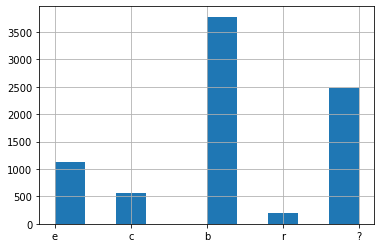

In [136]:
df["stalk_root"].hist();

In [129]:
# import matplotlib.pyplot as plt

# fig,axes = plt.subplots(4,2,figsize=(12,15))
# for idx,cat_col in enumerate(df["stalk-root"]):
#     row,col = idx//2,idx%2
#     sns.countplot(x=cat_col,data=df["stalk-root"],ax=axes[row,col])


# plt.subplots_adjust(hspace=1)

In [137]:
df["stalk_root"].unique()

array(['e', 'c', 'b', 'r', '?'], dtype=object)

In [138]:
df["stalk_shape"].value_counts()

t    4608
e    3516
Name: stalk_shape, dtype: int64

In [10]:
# e=equal    1120 
# c=club     556
# b=bulbous  3776
# r=rooted   192
# ?= missing  2480

In [140]:
# print("stalk-root bulbous=b,club=c,cup=u,equal=e,rhizomorphs=z,rooted=r,missing=?")
df['gill_size'].value_counts()

b    5612
n    2512
Name: gill_size, dtype: int64

In [141]:
df["stalk_shape"].value_counts()

t    4608
e    3516
Name: stalk_shape, dtype: int64

In [142]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap_shape                 8124 non-null   object
 2   cap_surface               8124 non-null   object
 3   cap_color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill_attachment           8124 non-null   object
 7   gill_spacing              8124 non-null   object
 8   gill_size                 8124 non-null   object
 9   gill_color                8124 non-null   object
 10  stalk_shape               8124 non-null   object
 11  stalk_root                8124 non-null   object
 12  stalk_surface_above_ring  8124 non-null   object
 13  stalk_surface_below_ring  8124 non-null   object
 14  stalk_color_above_ring  

In [143]:
df.describe()

,class,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,...,stalk_surface_below_ring,stalk_color_above_ring,stalk_color_below_ring,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


In [144]:
df.shape

(8124, 23)

In [145]:
df["class"].unique()

array(['p', 'e'], dtype=object)

In [17]:
df["class"].value_counts()

e    4208
p    3916
Name: class, dtype: int64

/home/gb/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


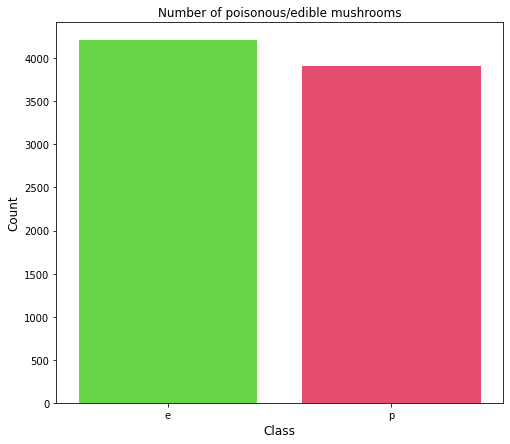

In [146]:
count = df['class'].value_counts()
plt.figure(figsize=(8,7))
sns.barplot(count.index, count.values, alpha=0.8, palette="prism")
plt.ylabel('Count', fontsize=12)
plt.xlabel('Class', fontsize=12)
plt.title('Number of poisonous/edible mushrooms')
#plt.savefig("mushrooms1.png", format='png', dpi=500)
plt.show()

<AxesSubplot:>

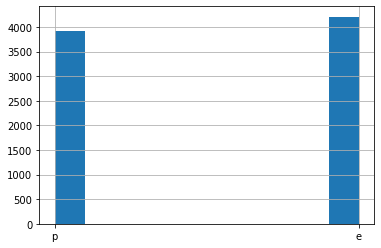

In [19]:
df['class'].hist()

In [147]:
df['gill_size'].value_counts()

b    5612
n    2512
Name: gill_size, dtype: int64

In [151]:
#encoding the categorical columns
labelencoder=LabelEncoder()
for column in df.columns:
    df[column] = labelencoder.fit_transform(df[column])

In [152]:
df["stalk_shape"].value_counts()

1    4608
0    3516
Name: stalk_shape, dtype: int64

In [153]:
df['gill_size'].value_counts()

0    5612
1    2512
Name: gill_size, dtype: int64

In [154]:
df.head()

,class,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,...,stalk_surface_below_ring,stalk_color_above_ring,stalk_color_below_ring,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1


In [155]:
df["stalk_root"].value_counts()

1    3776
0    2480
3    1120
2     556
4     192
Name: stalk_root, dtype: int64

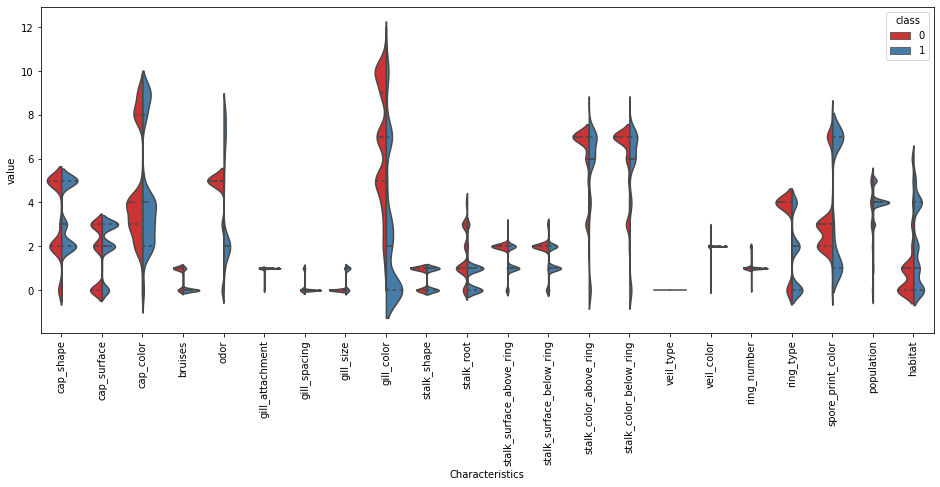

In [156]:
df_div = pd.melt(df, "class", var_name= "Characteristics")  
fig, ax = plt.subplots(figsize=(16,6))

p = sns.violinplot(ax = ax,
                   x="Characteristics",
                   y="value",
                   hue="class",
                   split = True,
                   data=df_div,
                   inner = "quartile",
                   palette = "Set1")

df_no_class = df.drop(["class"],axis = 1)

p.set_xticklabels(rotation = 90, labels = list(df_no_class.columns));
#plt.savefig(“violinplot.png”, format=’png’, dpi=500, bbox_inches=’tight’)



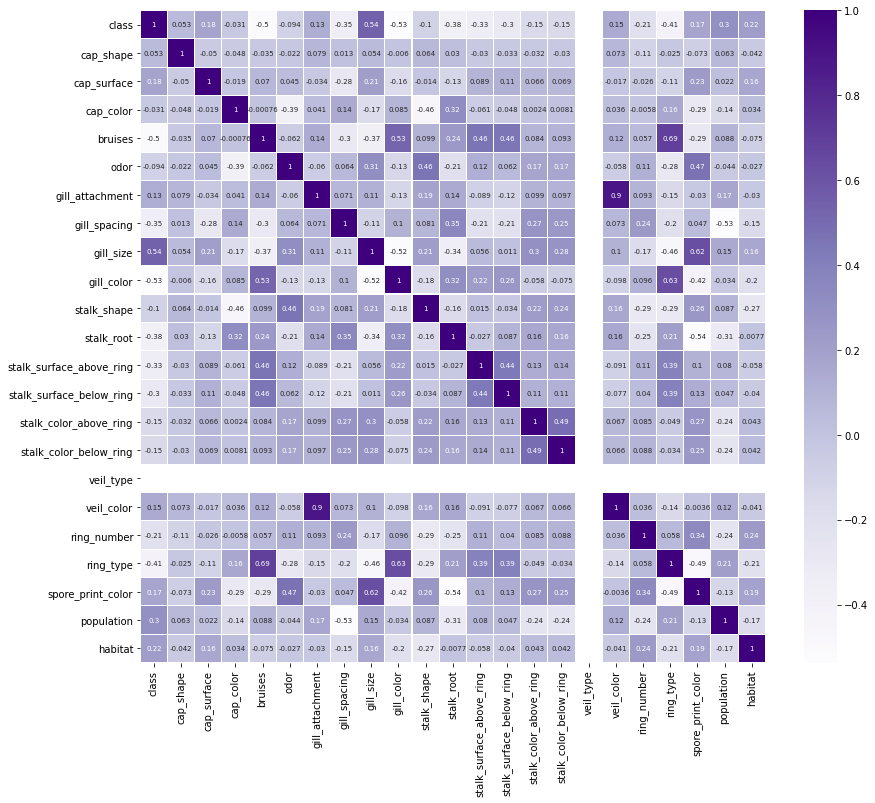

In [157]:
plt.figure(figsize=(14,12))
sns.heatmap(df.corr(),linewidths=.1,cmap="Purples", annot=True, annot_kws={"size": 7})
plt.yticks(rotation=0);
#plt.savefig("corr.png", format='png', dpi=400, bbox_inches='tight')

In [158]:
df[['class', 'gill_color']].groupby(['gill_color'], as_index=False).mean().sort_values(by='class', ascending=False)

,gill_color,class
0,0,1.000000
8,8,1.000000
3,3,0.721311
2,2,0.670213
7,7,0.428954
11,11,0.255814
10,10,0.204659
4,4,0.156863
5,5,0.106870
9,9,0.097561


/home/gb/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/home/gb/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:3710: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/home/gb/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


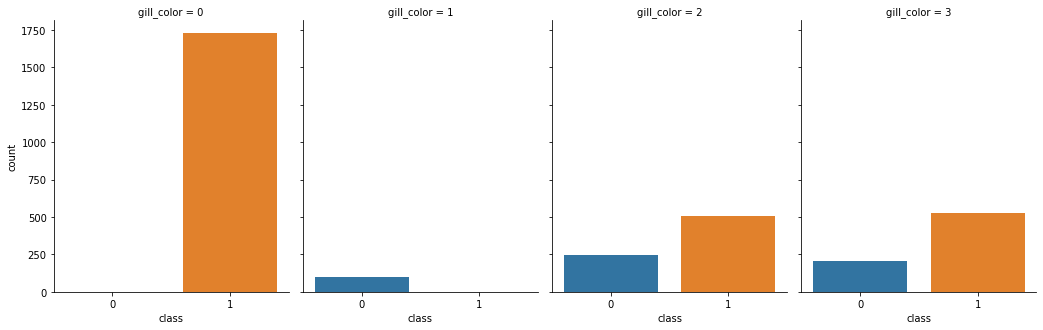

In [159]:
new_var = df[['class', 'gill_color']]
new_var = new_var[new_var['gill_color']<=3.5]
sns.factorplot('class',
               col='gill_color',
               data=new_var, 
               kind='count',
               size=4.5,
               aspect=.8, 
               col_wrap=4);
#plt.savefig("gillcolor1.png", format='png', dpi=500, bbox_inches='tight')

/home/gb/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/home/gb/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:3710: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/home/gb/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


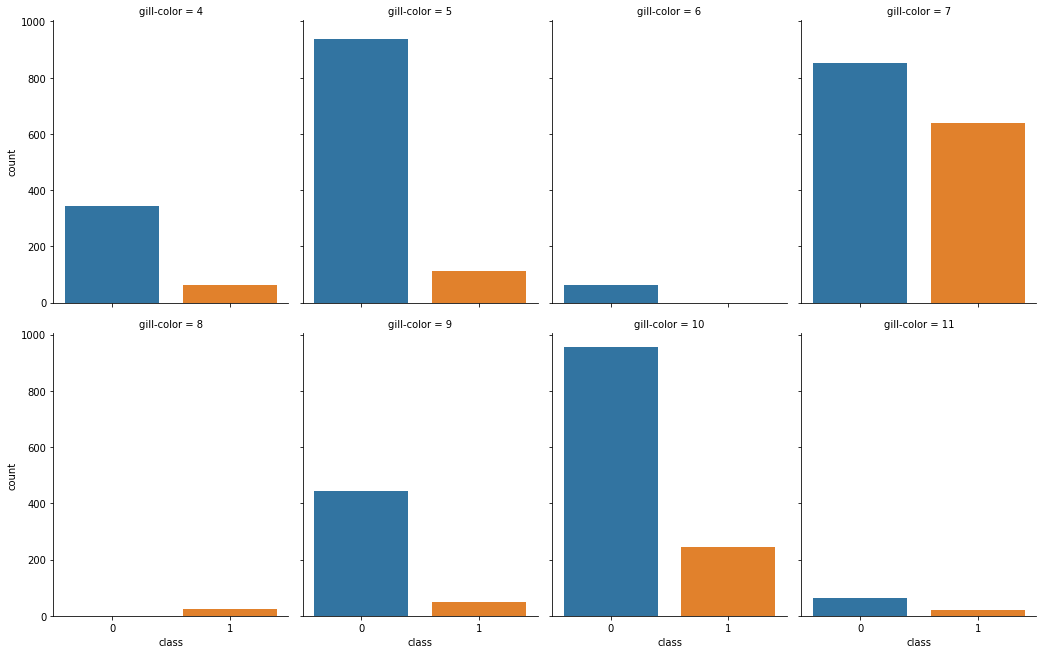

In [27]:
new_var=df[['class', 'gill-color']]
new_var=new_var[new_var['gill-color']>3.5]
sns.factorplot('class', col='gill-color', data=new_var, kind='count', size=4.5, aspect=.8, col_wrap=4);#plt.savefig("gillcolor2.png", format='png', dpi=400, bbox_inches='tight')

Preparing the data

In [160]:
df["stalk_root"].value_counts()

1    3776
0    2480
3    1120
2     556
4     192
Name: stalk_root, dtype: int64

In [161]:
# e=equal    1120 
# c=club     556
# b=bulbous  3776 
# r=rooted   192
# ?= missing  2480

# 0= missing
# 1=bulbous
# 2=club
# 3=equal
# 4=rooted

In [162]:
X = df.drop(['class'], axis=1)
y = df["class"]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.1)

In [163]:
X_train.head()

,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,stalk_shape,...,stalk_surface_below_ring,stalk_color_above_ring,stalk_color_below_ring,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat
4750,2,0,9,0,2,1,0,0,2,0,...,1,6,0,0,2,1,2,1,4,0
3026,5,0,5,0,1,1,1,1,9,0,...,2,7,7,0,2,1,4,2,3,0
3757,2,0,2,1,5,1,0,0,5,1,...,2,3,3,0,2,1,4,2,4,0
6167,2,2,2,0,8,1,0,1,0,1,...,1,6,7,0,2,1,0,7,4,4
6281,5,2,2,0,8,1,0,1,0,1,...,2,6,7,0,2,1,0,7,4,2


Classification Methods

In [164]:
# 1. Decision Tree Classification
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

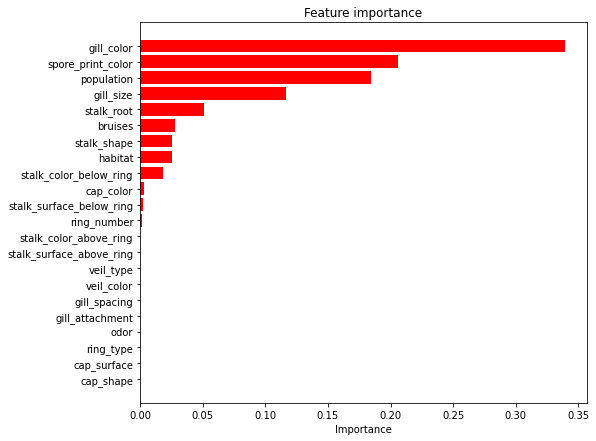

In [165]:
features_list = X.columns.values
feature_importance = dt.feature_importances_
sorted_idx = np.argsort(feature_importance)
plt.figure(figsize=(8,7))


plt.barh(range(len(sorted_idx)), feature_importance[sorted_idx], align='center', color ="red")
plt.yticks(range(len(sorted_idx)), features_list[sorted_idx])
plt.xlabel('Importance')
plt.title('Feature importance')
plt.draw()
#plt.savefig("featureimp.png", format='png', dpi=500, bbox_inches='tight')
plt.show()

Predicting and estimating the result

In [166]:
y_pred_dt = dt.predict(X_test)
print("Decision Tree Classifier report: \n\n", classification_report(y_test, y_pred_dt))
print("Test Accuracy: {}%".format(round(dt.score(X_test, y_test)*100, 2)))

Decision Tree Classifier report: 

               precision    recall  f1-score   support

           0       1.00      1.00      1.00       433
           1       1.00      1.00      1.00       380

    accuracy                           1.00       813
   macro avg       1.00      1.00      1.00       813
weighted avg       1.00      1.00      1.00       813

Test Accuracy: 100.0%


**Confusion Matrix for Decision Tree Classifier**

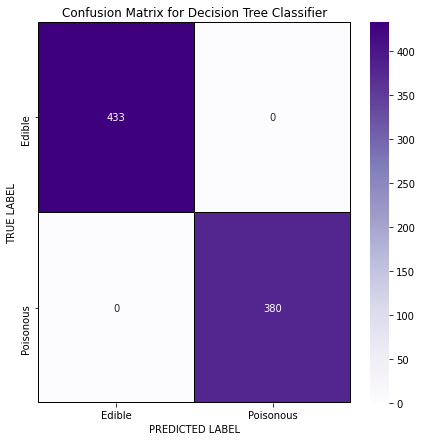

In [167]:
cm = confusion_matrix(y_test, y_pred_dt)

x_axis_labels = ["Edible", "Poisonous"]
y_axis_labels = ["Edible", "Poisonous"]

f, ax = plt.subplots(figsize =(7,7))
sns.heatmap(cm, annot = True, linewidths=0.2, linecolor="black", fmt = ".0f", ax=ax, cmap="Purples", xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for Decision Tree Classifier')
#plt.savefig("dtcm.png", format='png', dpi=500, bbox_inches='tight')
plt.show()

2. Logistic Regression Classification

In [168]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(solver="lbfgs", max_iter=500)
lr.fit(X_train, y_train)
print("Test Accuracy: {}%".format(round(lr.score(X_test, y_test)*100,2)))

Test Accuracy: 94.96%


Classification report of Logistic Regression Classifier

In [169]:
y_pred_lr = lr.predict(X_test)
print("Logistic Regression Classifier report: \n\n", classification_report(y_test, y_pred_lr))

Logistic Regression Classifier report: 

               precision    recall  f1-score   support

           0       0.96      0.94      0.95       433
           1       0.94      0.96      0.95       380

    accuracy                           0.95       813
   macro avg       0.95      0.95      0.95       813
weighted avg       0.95      0.95      0.95       813



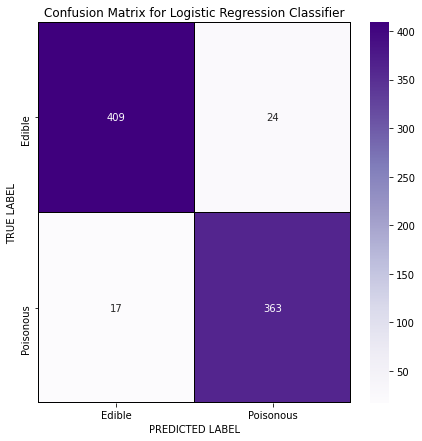

In [170]:
# Confusion Matrix for Logistic Regression Classifier

cm = confusion_matrix(y_test, y_pred_lr)
x_axis_labels = ["Edible", "Poisonous"]
y_axis_labels = ["Edible", "Poisonous"]
f, ax = plt.subplots(figsize =(7,7))
sns.heatmap(cm, annot = True, linewidths=0.2, linecolor="black", fmt = ".0f", ax=ax, cmap="Purples", xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for Logistic Regression Classifier')
#plt.savefig("lrcm.png", format='png', dpi=500, bbox_inches='tight')
plt.show()

3. KNN Classification

In [171]:
from sklearn.neighbors import KNeighborsClassifier
best_Kvalue = 0
best_score = 0
for i in range(1,10):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    if knn.score(X_test, y_test) > best_score:
        best_score = knn.score(X_train, y_train)
        best_Kvalue = i
        
print("Best KNN Value: {}".format(best_Kvalue))
print("Test Accuracy: {}%".format(round(best_score*100,2)))

Best KNN Value: 1
Test Accuracy: 100.0%


Classification report of KNN Classifier

In [172]:
y_pred_knn = knn.predict(X_test)
print("KNN Classifier report: \n\n", classification_report(y_test, y_pred_knn))

KNN Classifier report: 

               precision    recall  f1-score   support

           0       1.00      0.99      1.00       433
           1       0.99      1.00      1.00       380

    accuracy                           1.00       813
   macro avg       1.00      1.00      1.00       813
weighted avg       1.00      1.00      1.00       813



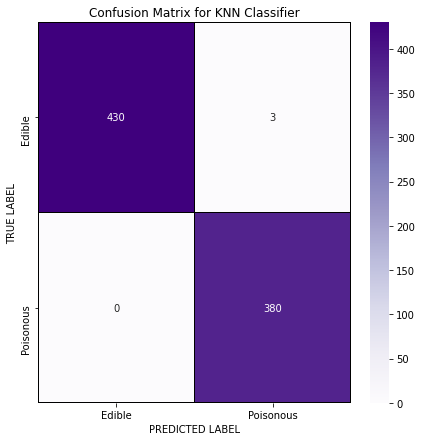

In [173]:
# Confusion Matrix for KNN Classifier

cm = confusion_matrix(y_test, y_pred_knn)
x_axis_labels = ["Edible", "Poisonous"]
y_axis_labels = ["Edible", "Poisonous"]
f, ax = plt.subplots(figsize =(7,7))
sns.heatmap(cm, annot = True, linewidths=0.2, linecolor="black", fmt = ".0f", ax=ax, cmap="Purples", xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for KNN Classifier')
#plt.savefig("knncm.png", format='png', dpi=500, bbox_inches='tight')
plt.show()

4. SVM Classification

In [174]:
from sklearn.svm import SVC
svm = SVC(random_state=42, gamma="auto")
svm.fit(X_train, y_train)
print("Test Accuracy: {}%".format(round(svm.score(X_test, y_test)*100, 2)))

Test Accuracy: 100.0%


In [175]:
# Classification report of SVM Classifier

y_pred_svm = svm.predict(X_test)
print("SVM Classifier report: \n\n", classification_report(y_test, y_pred_svm))

SVM Classifier report: 

               precision    recall  f1-score   support

           0       1.00      1.00      1.00       433
           1       1.00      1.00      1.00       380

    accuracy                           1.00       813
   macro avg       1.00      1.00      1.00       813
weighted avg       1.00      1.00      1.00       813



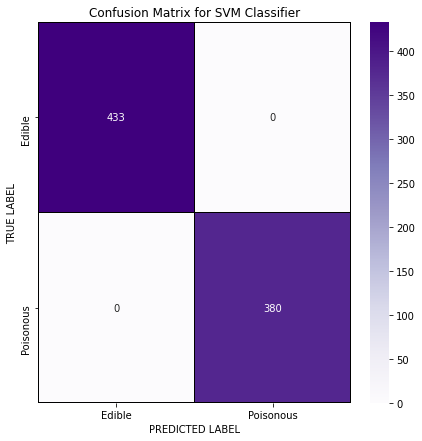

In [176]:
# Confusion Matrix for SVM Classifier

cm = confusion_matrix(y_test, y_pred_svm)
x_axis_labels = ["Edible", "Poisonous"]
y_axis_labels = ["Edible", "Poisonous"]
f, ax = plt.subplots(figsize =(7,7))
sns.heatmap(cm, annot = True, linewidths=0.2, linecolor="black", fmt = ".0f", ax=ax, cmap="Purples", xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for SVM Classifier')
#plt.savefig("svmcm.png", format='png', dpi=500, bbox_inches='tight')
plt.show()

5. Naive Bayes Classification

In [177]:
from sklearn.naive_bayes import GaussianNB

nb=GaussianNB()
nb.fit(X_train, y_train)

print("test accuracy : {}%".format(round(nb.score(X_test, y_test)*100, 2)))

test accuracy : 92.62%


Classification report of Naive Bayes Classifier

In [178]:
y_pred_nb = nb.predict(X_test)
print("Naive Bayes Classifier report: \n\n", classification_report(y_test, y_pred_nb))

Naive Bayes Classifier report: 

               precision    recall  f1-score   support

           0       0.94      0.92      0.93       433
           1       0.91      0.94      0.92       380

    accuracy                           0.93       813
   macro avg       0.93      0.93      0.93       813
weighted avg       0.93      0.93      0.93       813



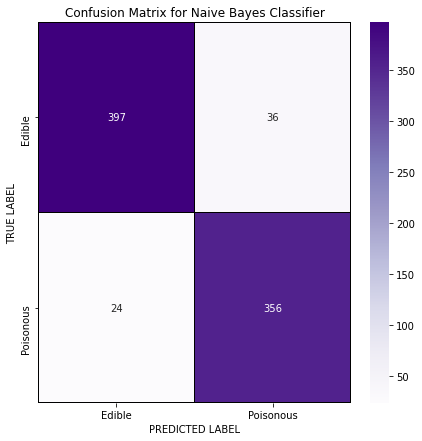

In [179]:
#confusion matrix

cm = confusion_matrix(y_test, y_pred_nb)
x_axis_labels = ["Edible", "Poisonous"]
y_axis_labels = ["Edible", "Poisonous"]
f, ax = plt.subplots(figsize =(7,7))
sns.heatmap(cm, annot = True, linewidths=0.2, linecolor="black", fmt = ".0f", ax=ax, cmap="Purples", xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for Naive Bayes Classifier')
#plt.savefig("nbcm.png", format='png', dpi=500, bbox_inches='tight')
plt.show()

6. Random Forest Classification

In [180]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
print("Test Accuracy: {}%".format(round(rf.score(X_test, y_test)*100, 2)))

Test Accuracy: 100.0%


In [181]:
# Classification report of Random Forest Classifier
y_pred_rf = rf.predict(X_test)
print("Random Forest Classifier report: \n\n", classification_report(y_test, y_pred_rf))


Random Forest Classifier report: 

               precision    recall  f1-score   support

           0       1.00      1.00      1.00       433
           1       1.00      1.00      1.00       380

    accuracy                           1.00       813
   macro avg       1.00      1.00      1.00       813
weighted avg       1.00      1.00      1.00       813



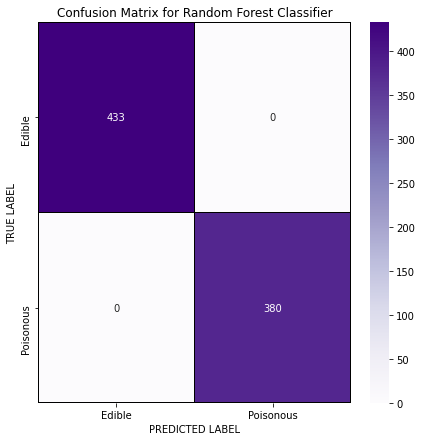

In [182]:
# Confusion Matrix for Random Forest Classifier


cm = confusion_matrix(y_test, y_pred_rf)
x_axis_labels = ["Edible", "Poisonous"]
y_axis_labels = ["Edible", "Poisonous"]
f, ax = plt.subplots(figsize =(7,7))
sns.heatmap(cm, annot = True, linewidths=0.2, linecolor="black", fmt = ".0f", ax=ax, cmap="Purples", xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for Random Forest Classifier');
#plt.savefig("rfcm.png", format='png', dpi=500, bbox_inches='tight')
plt.show()

In [183]:
preds = dt.predict(X_test)
print(preds[:36])
print(y_test[:36].values)

[0 1 1 0 1 1 1 1 0 0 0 1 0 0 0 0 0 1 0 0 0 0 1 0 1 0 0 0 0 1 1 1 0 0 0 1]
[0 1 1 0 1 1 1 1 0 0 0 1 0 0 0 0 0 1 0 0 0 0 1 0 1 0 0 0 0 1 1 1 0 0 0 1]


## feature seection

In [184]:
X = df[['gill_color', 'spore_print_color', 'population','gill_size', 'stalk_root','bruises','stalk_shape']]
y = df["class"]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.1)

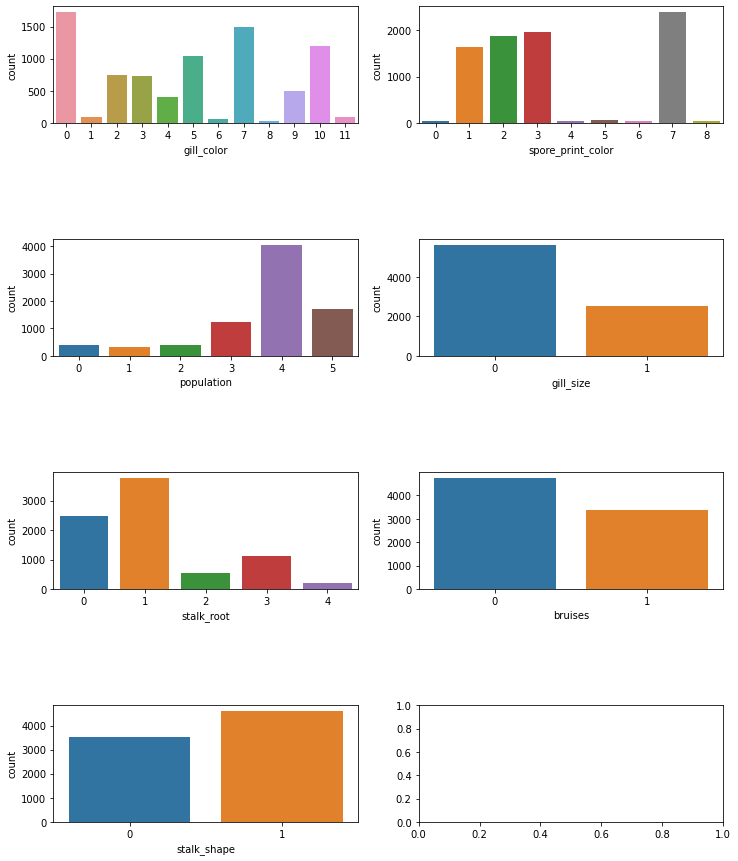

In [185]:
import matplotlib.pyplot as plt

fig,axes = plt.subplots(4,2,figsize=(12,15))
for idx,cat_col in enumerate(X):
    row,col = idx//2,idx%2
    sns.countplot(x=cat_col,data=X,ax=axes[row,col])


plt.subplots_adjust(hspace=1)

In [186]:
X['gill_color'].value_counts()

0     1728
7     1492
10    1202
5     1048
2      752
3      732
9      492
4      408
1       96
11      86
6       64
8       24
Name: gill_color, dtype: int64

In [206]:
x="xamp"
y=float(x)

ValueError: could not convert string to float: 'xamp'

In [202]:
type(x)

str

In [187]:
# 1. Decision Tree Classification
from sklearn.tree import DecisionTreeClassifier
dt1 = DecisionTreeClassifier()
dt1.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [188]:
dt1

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [189]:
# save the model to disk

import pickle
filename = 'decision_tree.pkl'
pickle.dump(dt1, open(filename, 'wb'))

In [190]:
loaded_dt1_model=pickle.load(open(filename, 'rb'))

In [191]:
loaded_dt1_model.predict(X_test.iloc[8:9])

array([0])

In [192]:
y_test.iloc[8:9]

1811    0
Name: class, dtype: int64

In [193]:
X_test.iloc[8:9]

,gill_color,spore_print_color,population,gill_size,stalk_root,bruises,stalk_shape
1811,5,2,4,0,1,1,1


In [194]:
X_test

,gill_color,spore_print_color,population,gill_size,stalk_root,bruises,stalk_shape
1971,3,3,3,0,3,0,1
6654,0,7,4,1,0,0,1
5606,0,7,4,1,0,0,1
3332,5,3,5,0,1,1,1
6988,0,7,4,1,0,0,1
...,...,...,...,...,...,...,...
641,5,3,5,0,4,1,0
5789,10,5,4,0,1,1,0
5634,0,7,4,1,0,0,1
1025,7,3,3,1,3,1,0


In [195]:
X_train.head()

,gill_color,spore_print_color,population,gill_size,stalk_root,bruises,stalk_shape
4750,2,1,4,0,1,0,0
3026,9,2,3,1,1,0,0
3757,5,2,4,0,1,1,1
6167,0,7,4,1,0,0,1
6281,0,7,4,1,0,0,1


In [196]:
X_train["gill_color"].value_counts()

0     1562
7     1336
10    1097
5      960
2      669
3      652
9      435
4      355
1       88
11      78
6       56
8       23
Name: gill_color, dtype: int64

In [197]:
df["gill_color"].value_counts()

0     1728
7     1492
10    1202
5     1048
2      752
3      732
9      492
4      408
1       96
11      86
6       64
8       24
Name: gill_color, dtype: int64

In [198]:
# input from page # Your mushroom is ['k', 'b', 'c', 'n', '2', 'f', 'e']

# gill_color,spore_print_color,population,gill_size,stalk_root,bruises,stalk_shape

NameError: name 'gill_color' is not defined

In [199]:
df["gill_color"].index

RangeIndex(start=0, stop=8124, step=1)

In [200]:
X_train["gill_color"].value_counts()

0     1562
7     1336
10    1097
5      960
2      669
3      652
9      435
4      355
1       88
11      78
6       56
8       23
Name: gill_color, dtype: int64